In [3]:
from sage.matroids.advanced import *
from sage.combinat.posets.posets import FinitePoset

In [4]:
def upside_down(liste):
    ud_liste= []
    for j in range(0, len(liste)):
        new_cover = []
        for i in range(0, max_given): 
            if j in liste[i]:
                new_cover.append(i)
        ud_liste.append(new_cover)
    return ud_liste


In [5]:
def stretch(i):
    st_0 = [[1,2], [3], [3], [4,5], [6], [6], []]
    for i in range (0, i):
        st_0.insert(4+2*i, [6+2*i])
        st_0.insert(5+2*i, [7+2*i])
    st_0[4+2*i +2] = [5+2*i+3]
    st_0[4+2*i +3] = [5+2*i+3]
    return st_0

In [6]:
def ladder(i):
    ladder= [[1,2,3], [4], [4], [4],[] ]
    j = -1
    for j in range (0, i):
        ladder.insert(1+ j*3, [4+j*3, 5+j*3]) 
        ladder.insert(2+j*3, [4+j*3, 6+j*3])
        ladder.insert(3+j*3, [5+j*3, 6+j*3])
    if i >0:
        ladder[4+j*3]= [4+i*3]
        ladder[5+j*3] =[ 4+i*3]
        ladder[6+j*3] =  [4+i*3]
    
    return ladder



In [7]:

#computes X-chow function
def P(liste):
    return FinitePoset(DiGraph(dict([[j,liste[j]] for j in range(0,len(liste))])), facade=False)
#accepts poset

In [8]:
po_0 = P([[1], []])
po_1 = P([[1,2], [3], [3], []])
po_2 = P([[1,2, 3], [4], [4], [4], []]) 

#free matroid

po_3 = P([[1,2], [3,4], [3,4], [5], [5], [] ])
po_4 = P([[1,2,3], [4,5], [5,6], [6,4],[7], [7], [7], []])
po_5 = P([[1,2,3], [4],[4,5,6], [6], [7], [7], [7], []])
po_6 = P([[1,2,3], [4], [4,5], [5], [6], [6], []])


list_1 = [po_1, po_2, po_3, po_4, po_5, po_6]
#print('Example posets')

In [93]:


def Xchow(Poset):
    R.<q> =PolynomialRing(RationalField(), order='lex')
    L = []
    if type(Poset) == list:
        Poset = P(Poset)
    Po = Poset
    top = None
    bottom = None
    
    if not len(Po.maximal_elements()) ==1:
        top = 'top'
    if not len(Po.minimal_elements()) ==1:
        bottom = 'bottom'
    Po= Po.with_bounds(labels=(bottom, top))

    #computes the chacteristic polynomials
    #assumes that maximum is last element
    max_given = Po.cardinality()
    for el_1 in Po.list(): 
        for el_2 in Po.list():
            if Po.is_greater_than(el_2, el_1) or el_1 == el_2:
                            els = Po.closed_interval(el_1, el_2) 
                            subpo = Po.subposet(els) 
                            L.append((subpo.characteristic_polynomial()))
            else:
                L.append(0)
                
    M4 = MatrixSpace(R, Po.cardinality(), Po.cardinality())
    A = M4(L); A
    A_bar= []

    for h, el in enumerate(L):
        if el == 1:
            A_bar.append(-1)
        else:
            g = el/(q-1)
            A_bar.append(el/(q-1))
    size = Po.cardinality()-1
    A_bar = M4(A_bar)
    #for l in range (0, Po.cardinality()):
      #  s = A_bar.inverse()[l][Po.cardinality()-1]
        #if not s == 0: 
        #    print(s.factor())
        #if s == 0:
        #    print(s)
    #return A.transpose(), A_bar.transpose(), -A_bar.transpose().inverse()
    
    return -1* A_bar.inverse()[0][Po.cardinality()-1]




In [96]:
def Moeb(liste):
    L = []
    if type(liste) == list:
        liste = P(liste)
    Po = liste
    top = None
    bottom = None
    
    if not len(Po.maximal_elements()) ==1:
        top = 'top'
    if not len(Po.minimal_elements()) ==1:
        bottom = 'bottom'
        
    Po= Po.with_bounds(labels=(bottom, top))
    min_giv = 0
    max_giv = Po.cardinality()-1
    #computes the characteristic polynomials
    
    for el_1 in Po.list(): 
        for el_2 in Po.list():
                L.append(Po.moebius_function(el_1, el_2))

    M4 = MatrixSpace(QQ, len(liste), len(liste))
    return M4(L)[:max_giv, 1:], M4(L)[:max_giv, 1:].inverse()

#po_4 = [[1,2], [3], [3]]
po_4 = [[1,2,3], [4,5], [5,6], [6,4],[7], [7], [7], []]
po_0 = P([[1], []])
p_product_po = P(po_4).product(po_0).product(po_0).product(po_0)
ca = product_po.cardinality()
A1, A2 = Moeb(product_po)
po_1
X = Xchow(p_product_po)
print(X)



q^5 + 57*q^4 + 302*q^3 + 302*q^2 + 57*q + 1


[1 2 3]
[4 5 6]
[7 8 9]


In [15]:
#products with edge
product_po = po_4.product(po_0)

Xchow(po_4).factor()
Xchow(product_po)
po_4.show()
product_po.show()


AttributeError: 'list' object has no attribute 'product'

Stacking a poset with minimum and maximum


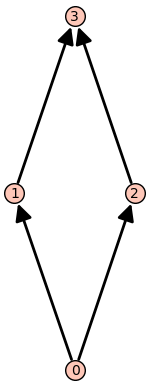

q + 1
Chow function of the Poset stacked 4 times
(q + 1)^2 * (q^2 + 3*q + 1)
Chow function of the Poset stacked 5 times
(q + 1)^3 * (q^2 + 3*q + 1)^2
Chow function of the Poset stacked 6 times
(q + 1)^4 * (q^2 + 3*q + 1)^3
Stacking a different poset with minimum and maximum


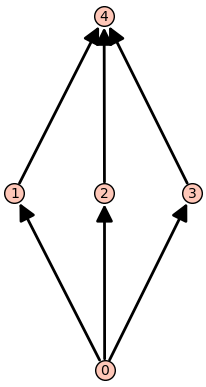

q + 1
Chow function of the Poset stacked 4 times
(q + 1)^2 * (q^2 + 4*q + 1)
Sum of two posets with minimum
Chow function of the first and second poset
q + 1
q + 1
Chow function of the sum of both posets
q^4 + 6*q^3 + 10*q^2 + 6*q + 1
q^4 + 5*q^3 + 8*q^2 + 5*q + 1
Sum of a poset without minima, maxima


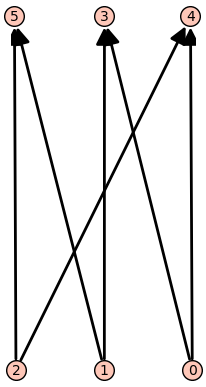

Chow function of the Poset stacked 4 times
1


In [ ]:
po_7= [[3,4], [3,5], [4,5], [], [], []]
print('Stacking a poset with minimum and maximum')
po_1.show()
print(char(po_1))

po_sum = po_1.ordinal_sum(po_1)
for i in range (2, 5):
    print('Chow function of the Poset stacked ' + str(i+2) + ' times')
    print(char(po_sum).factor())
    po_sum = po_sum.ordinal_sum(po_1)

print('Stacking a different poset with minimum and maximum')
po_2.show()
print(char(po_2))

po_sum = po_2.ordinal_sum(po_2)
for i in range (2, 3):
    print('Chow function of the Poset stacked ' + str(i+2) + ' times')
    print(char(po_sum).factor())
    po_sum = po_sum.ordinal_sum(po_2)

print('Sum of two posets with minimum')

print('Chow function of the first and second poset')
print(char(po_2))
print(char(po_1))

print('Chow function of the sum of both posets')
po_3 = po_1.ordinal_sum(po_2)
print(char(po_3))

po_4 = po_2.ordinal_sum(po_1)
print(char(po_4))

print('Sum of a poset without minima, maxima')

P(po_7).show()
po_add = P(po_7)
po_sum = P([[]])
for i in range (2, 3):
    print('Chow function of the Poset stacked ' + str(i+2) + ' times')
    print(char(po_sum).factor())
    po_sum = po_sum.ordinal_sum(po_add)
    

In [ ]:
class element:
    def __init__(self, new, poset_el, name):
        self.poset_el = poset_el
        self.new = new 
        self.name = name

A = Poset(DiGraph({'0':['1','2', '3'], '1': ['4', '5'], '2' : ['4', '6'], '3': ['5', '6'], '4': ['7'] , '5': ['7'], '6': ['7'], '7' : []}))

def blow_up(Pos, point, j):
    #helper list
    D = []

    in_els= [el for el in Pos.list() if (not Pos.is_gequal(el, point))]

    in_els2 =  [el for el in Pos.list() if (not Pos.is_gequal(el, point)) and (not Pos.join(el, point) is None)]

    for in_el in in_els:
        D.append(element(False, in_el, str(in_el)))
        if in_el in in_els2:
            D.append(element(True, in_el, str(j + str(in_el))))

    final_dict = {}
    #add relations


    for el in D:
        covering = []
        if el.new:
            for el2 in D:
                if el2.new and el2.poset_el in Pos.upper_covers(el.poset_el):
                    covering.append(el2.name)

        else:
            for el2 in D:
                if (not el2.new) and el2.poset_el in Pos.upper_covers(el.poset_el):
                    covering.append(el2.name)
                #if el2.new and el2.poset_el in Pos.upper_covers(el.poset_el):
                    #covering.append(el2.name)

            if el.poset_el in in_els2:
                covering.append(j+ el.name)
                
        final_dict[el.name] = covering
    return Poset(DiGraph(final_dict))

B = blow_up( A, A.list()[7], 'p')

C = blow_up(B, B.list()[5], 'j')

#B.show()
print(char(B))
#B.show()
#print(C.list())
print(char(C))


q^3 + 10*q^2 + 10*q + 1
q^3 + 13*q^2 + 13*q + 1


[frozenset(), frozenset({2}), frozenset({3}), frozenset({2, 3}), frozenset({1}), frozenset({5}), frozenset({1, 2, 5}), frozenset({4}), frozenset({1, 4}), frozenset({3, 4, 5}), frozenset({0}), frozenset({0, 2, 4}), frozenset({0, 1, 3}), frozenset({0, 5}), frozenset({0, 1, 2, 3, 4, 5})]
q^2 + 8*q + 1


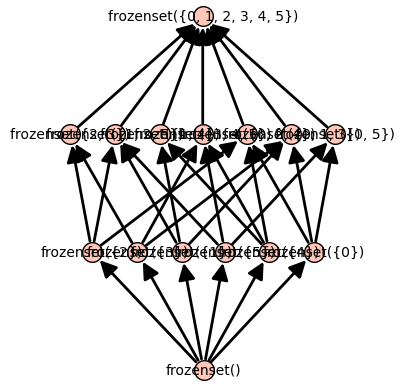

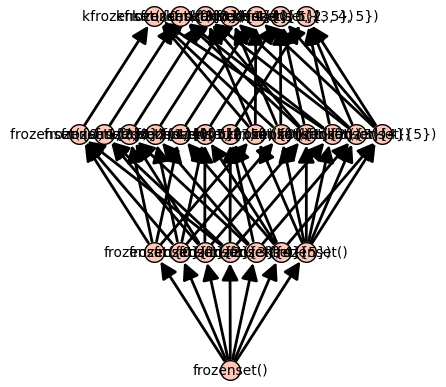

q^3 + 21*q^2 + 21*q + 1


In [ ]:
M =  M = matroids.CompleteGraphic(4)
L = M.lattice_of_flats()
print(L.list())
print(char(L))
L.show()
blow_up(L, L.list()[14], 'k').show()
#blow_up(L, L.list()[7], 'k').show()
print(char(blow_up(L, L.list()[14], 'k')))                            

In [ ]:
P1 = P([[3,4], [3,5], [4,5], [6], [6], [6], []])
P2 = P([[4,5], [5,8], [6,8], [7, 8], [9], [9], [10], [10], [9, 10], [], []])
P3 = P([[7,8,9], [9, 10, 14], [11, 14, 15],[7, 17, 18], [12, 15, 16], [13,16, 17], [8, 10, 11, 12, 13, 18],[24], [19, 24], [19], [19, 20], [20, 21], [21, 22], [22, 23], [20],[21], [22], [23], [23, 24], [], [], [], [], [], []])
print(char(P1))
print(char(P2))


q^2 + 4*q + 1
q^3 + 8*q^2 + 8*q + 1


In [ ]:
X = SimplicialComplex([[0,1,3], [1,2, 3], [0,1,2], [0,2,3]])
P5 = X.face_poset()
Pot = P5.with_bounds(labels = ['bottom', 'top'])
print(char(Pot))
#X.face_poset()
Y = X.barycentric_subdivision()
Y = Y.barycentric_subdivision()
#P6.show()
#print(char(P6))
#P6.maximal_elements()
P6 = Y.face_poset()
print(char(P6))

q^3 + 11*q^2 + 11*q + 1
q^3 + 361*q^2 + 361*q + 1


In [ ]:
#performing barycentric subdivision
C1 = simplicial_complexes.Sphere(2)
C2 = simplicial_complexes.RealProjectivePlane()
C3 = C2.connected_sum(C2)
liste = [C1, C2, C3]
'''for s_complex in liste:
    div_complex = s_complex.barycentric_subdivision()
    print('new')
    print(char(s_complex.face_poset()))
    print(char(div_complex.face_poset()))'''

#subdivide only one face
M = C1.facets()
new_s = SimplicialComplex(maximal_faces = [M[0]]).barycentric_subdivision()
my_faces = new_s.maximal_faces()
my_faces.union(Set(M[1:]))
print(my_faces)
New_M = SimplicialComplex(maximal_faces = [my_faces])
#print(char(New_M.face_poset()))

{((1, 2), (1, 2, 3), (1,)), ((1, 2, 3), (2, 3), (3,)), ((1, 2, 3), (3,), (1, 3)), ((1, 2, 3), (1,), (1, 3)), ((2,), (1, 2), (1, 2, 3)), ((2,), (1, 2, 3), (2, 3))}


In [ ]:
'''print('Products with the following Poset:' )
po_0.show()
for k in range( 0, len(list_1)):
        product_po = po_0.product(list_1[k])
        print('Product with poset list index ' + str(k))
        print(Xchow(po_0).factor())
        print (Xchow(list_1[k]).factor())
        print(Xchow(product_po).factor())'''
'''for l in range (0, len(list_1)):
    print('Poset ' + str(l))
    list_1[l].show()
for l in range (0, len(list_1)):
    for k in range( 0, len(list_1)):
        product_po = list_1[l].product(list_1[k])
        print(str(l)+ " ; " + str(k))
        print(Xchow(list_1[l]))
        list_1[l].show()
        print (X-chow(list_1[k]))
        list_1[k].show()
        print(X-chow(product_po).factor())
        #product_po.show()'''
        